In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
from ydata_profiling import ProfileReport

# Data Collection

In [12]:
from bs4 import BeautifulSoup
import requests

In [46]:
forbes_df=pd.read_csv('2022_forbes_billionaires.csv',index_col=0)

# Data Cleaning

In [48]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 162.5+ KB


In [49]:
# Creating and Displaying an analysis report for your data
forbes_report = sv.analyze(forbes_df)
forbes_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


$Initial Observation:$
1. There are 2600 ROWS, 0 DUPLICATE, 7FEATURES (2CATEGORICAL, 2NUMERICALAND 3TEXT)
2. networth is in Text as against numbers: need to remove the dollar & B characters and convert to float.

$Further Observations$
1. : -1.000 (Perfect negative correlatio between rank vs. networth($ Billion).
2. There is a weak positive correlation(0.124) between a person's net worth and their age. As age increases, net worth tends to increase slightly. This means that, on average, older individuals tend to have higher net worth, but the relationship is not very strong.
3. There is a weak positive correlation(0.104) between a person's age and the industry they are associated with. Older individuals tend to be associated with certain industries, but the correlation is not very strong.
4. There is a very weak positive correlation(0.044) between the industry a person is associated with and their net worth. The correlation is very close to zero, indicating almost no linear relationship between industry and net worth.ables.

In [50]:
forbes_df = forbes_df.rename(columns={'networth': 'networth($ Billion)'})

# Remove "$" and any non-numeric characters and convert to float
forbes_df['networth($ Billion)'] = forbes_df['networth($ Billion)'].str.replace('[\$, B]', '', regex=True).astype(float)

In [52]:
Forbes_df.head()

,rank,name,networth($ Billion),age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [56]:
forbes_df.isnull().sum()

rank                   0
name                   0
networth($ Billion)    0
age                    0
country                0
source                 0
industry               0
dtype: int64

In [57]:
forbes_df.duplicated().sum()

0

In [87]:
forbes_df.describe()

,rank,networth($ Billion),age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


In [58]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 2600 non-null   int64  
 1   name                 2600 non-null   object 
 2   networth($ Billion)  2600 non-null   float64
 3   age                  2600 non-null   int64  
 4   country              2600 non-null   object 
 5   source               2600 non-null   object 
 6   industry             2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 227.0+ KB


# Exploratory Analysis

In [51]:
#EDA profiling
fprofile = ProfileReport(forbes_df, title="Forbes_Data Profiling Report")
fprofile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Ranking and Net Worth: Top 10 Richest in the World

In [59]:
top_10_richest = forbes_df.sort_values(by='networth($ Billion)', ascending=False).head(10)
top_10_richest

,rank,name,networth($ Billion),age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


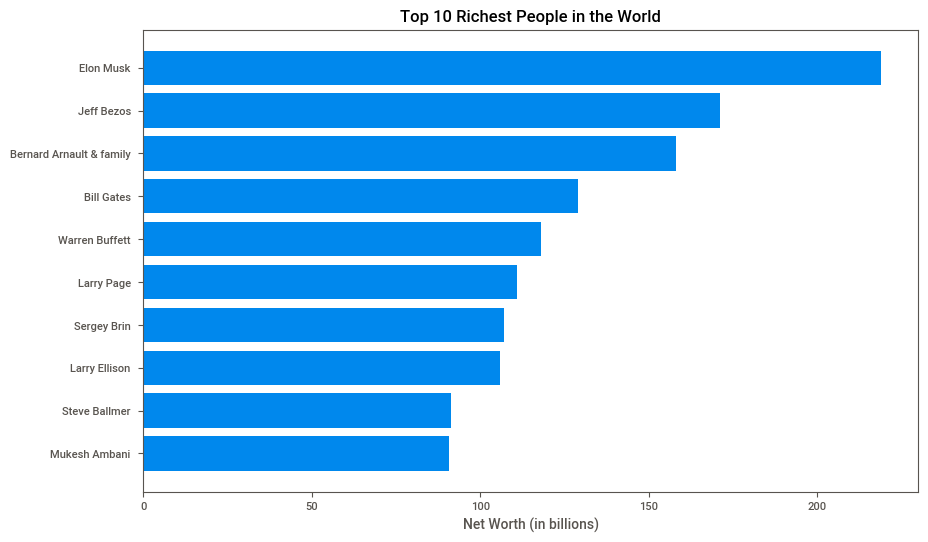

In [63]:
# Create a bar chart to visualize the top 10 richest people
plt.figure(figsize=(10, 6))
plt.barh(top_10_richest['name'], top_10_richest['networth($ Billion)'])
plt.xlabel('Net Worth (in billions)')
plt.title('Top 10 Richest People in the World')
plt.gca().invert_yaxis()  # Invert the order to display the richest at the top
plt.show()

Elon Musk holds the top rank with a net worth of 219.0 billion dollars, and his sources of wealth include Tesla and SpaceX in the automotive industry. Jeff Bezos is ranked second with a net worth of 171.0 billion dollars, and his primary source of wealth is Amazon in the technology industry.

## Country Analysis:country with the highest number of individual

In [65]:
# Which countries have the highest number of individuals in the dataset?
country_counts = forbes_df['country'].value_counts()
country_counts

United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: country, Length: 75, dtype: int64

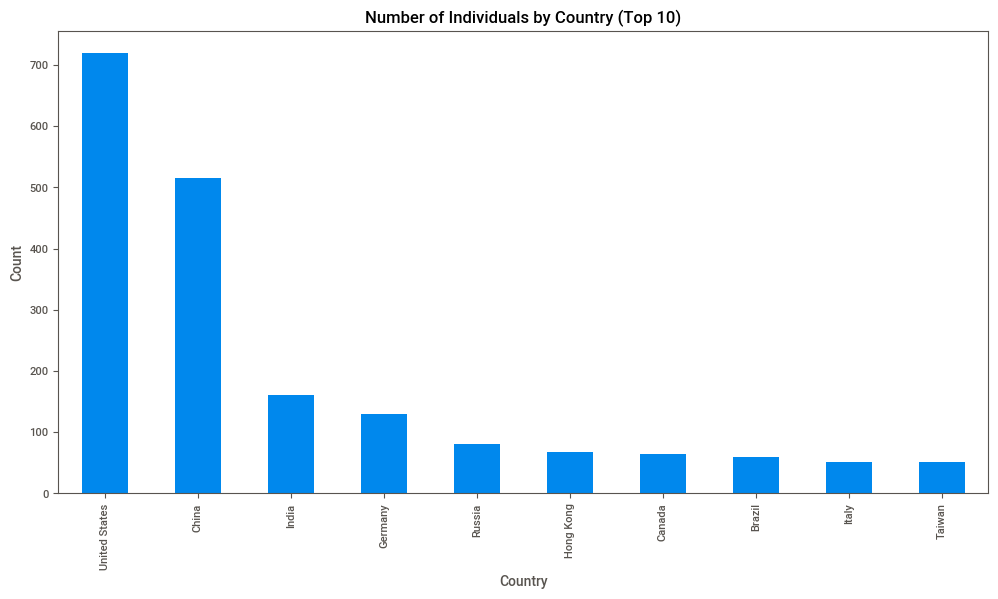

In [69]:
# Select the top 10 countries by count
top_10_countries = country_counts.head(10)

# Plot a bar chart to visualize the number of individuals from each of the top 10 countries
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar')
plt.title('Number of Individuals by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

The United States has the largest representation in the dataset, followed by China and then India. Germany holds the fourth position, and Russia follows closely in fifth place. 
While many Asian countries are well-represented in the dataset, the presence of African countries and the UK is not as apparent. This leads to the next question: How many individuals from the UK are included in the dataset?

In [78]:
# Filter the DataFrame to include individuals from the United Kingdom (UK)
uk_data = forbes_df[forbes_df['country'].isin(['United Kingdom'])]
#uk_data

In [86]:
uk_top_10_richest

,rank,name,networth($ Billion),age,country,source,industry
110,111,James Ratcliffe,16.3,69,United Kingdom,chemicals,Manufacturing
121,121,Michael Platt,15.2,54,United Kingdom,hedge funds,Finance & Investments
147,146,Hinduja brothers,12.7,64,United Kingdom,diversified,Diversified
221,221,James Dyson,9.2,74,United Kingdom,vacuums,Manufacturing
229,230,Ian & Richard Livingstone,8.9,64,United Kingdom,real estate,Real Estate
287,288,Christopher Hohn,7.9,55,United Kingdom,hedge funds,Finance & Investments
340,336,Nik Storonsky,7.1,37,United Kingdom,fintech,Finance & Investments
346,343,David Reuben,7.0,83,United Kingdom,"investments, real estate",Real Estate
347,343,Simon Reuben,7.0,80,United Kingdom,"real estate, investments",Diversified
459,460,Anthony Bamford & family,5.7,76,United Kingdom,construction equipment,Construction & Engineering


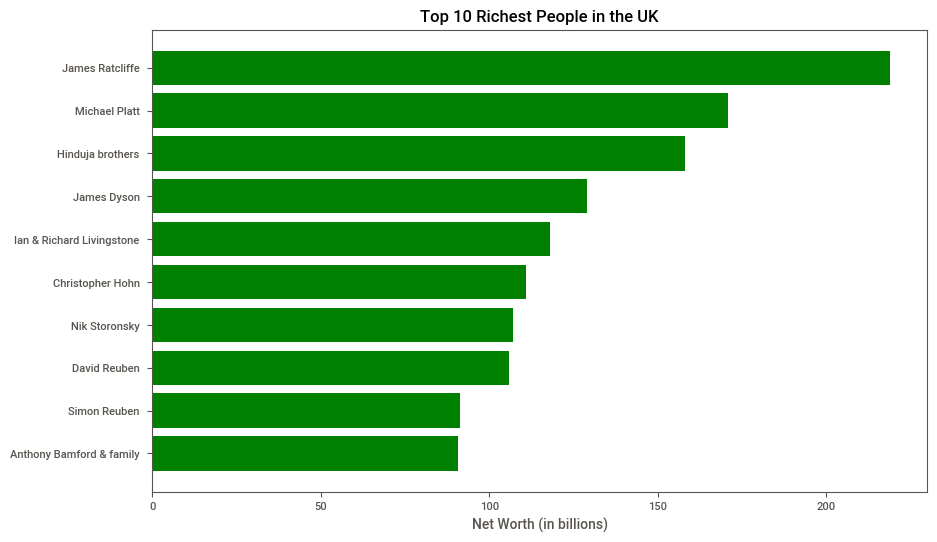

In [85]:
uk_top_10_richest = uk_data.sort_values(by='networth($ Billion)', ascending=False).head(10)

# Plot a bar chart to visualize the top 10 richest people in the world
plt.figure(figsize=(10, 6))
plt.barh(uk_top_10_richest['name'], top_10_richest['networth($ Billion)'], color='green')  # Corrected placement of the comma
plt.xlabel('Net Worth (in billions)')
plt.title('Top 10 Richest People in the UK')
plt.gca().invert_yaxis()  # Invert the order to display the richest at the top
plt.show()

1. The UK's top 5 billionaires have ranks that are notably lower than the dataset's mean rank of approximately 1269.57. This indicates that they hold relatively high positions in the global rankings, as their average rank is around 231. They are among the top-ranked individuals in the dataset.
2. The average net worth, which is around 8.2 billion, is significantly higher than the dataset's mean net worth of approximately 4.86 billion. This suggests that they have substantial wealth compared to the dataset's average. Their net worth values are among the highest in the dataset.
3. The average age is 68 years, which is slightly higher than the dataset's mean age of approximately 64.27 years. This indicates that they are, on average, slightly older than the dataset's average age. Age may not be as defining a factor in their high rankings and net worth.

*These billionaires perform exceptionally well in terms of rank and net worth. They hold top positions in the global rankings and have notably higher net worth values compared to the dataset's averages. Their ages are relatively older on average but are not a significant factor contributing to their high rankings and net worth. These individuals are among the wealthiest and most influential in the dataset.*

### What is the distribution of net worth among individuals from different countries?

In [89]:
# Group by country and calculate the mean net worth for each country
country_net_worth = forbes_df.groupby('country')['networth($ Billion)'].mean().sort_values(ascending=False)
country_net_worth

country
France           12.790698
Mexico           10.726667
Nigeria           9.400000
Denmark           7.000000
United States     6.516134
                   ...    
Tanzania          1.500000
Uruguay           1.500000
Nepal             1.500000
Hungary           1.250000
Estonia           1.200000
Name: networth($ Billion), Length: 75, dtype: float64

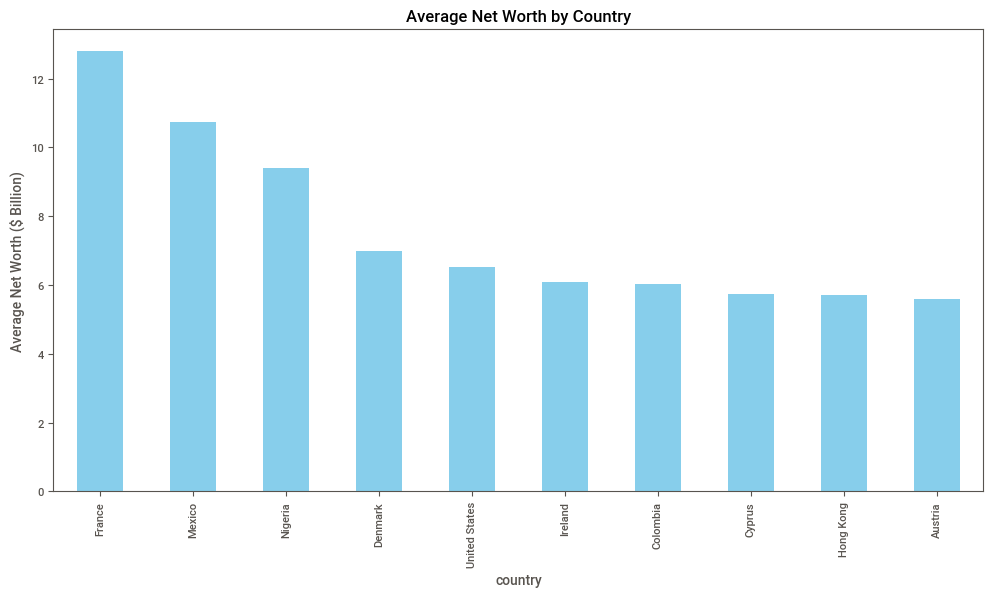

In [96]:
networth_average = country_net_worth.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
networth_average.plot(kind='bar', color='skyblue')  # You can choose a different color if desired
plt.title('Average Net Worth by Country')
plt.xlabel('country')
plt.ylabel('Average Net Worth ($ Billion)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


The top 10 countries with the highest average net worth in the dataset, led by France with an average net worth of approximately$12.79 billion, indicate significant wealth disparities across nations. France, Mexico, and Nigeria have notably higher average net worth, while the United States, despite its high representation, has a lower average net worth in comparison. This implies varying economic disparities among these countriet

The next question is what industry generates the most billionaires in the world?.

## Industry Analysis

In [99]:
unique_industries = forbes_df['industry'].unique()
unique_industries

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [104]:
industry_counts = forbes_df['industry'].value_counts()

# Find the industry with the highest count of billionaires
most_billionaires_industry = industry_counts.idxmax()
most_billionaires_count = industry_counts.max()

# Find the industry with the least count of billionaires
least_billionaires_industry = industry_counts.idxmin()
least_billionaires_count = industry_counts.min()

In [105]:
print(f"The industry that generates the most billionaires is {most_billionaires_industry} with {most_billionaires_count} billionaires.")
print(f"The industry that generates the least billionaires is {least_billionaires_industry} with {least_billionaires_count} billionaires.")

The industry that generates the most billionaires is Finance & Investments  with 386 billionaires.
The industry that generates the least billionaires is Gambling & Casinos  with 23 billionaires.


1. This analysis reveals that the "Finance and investments" industry has the highest number of billionaires, with a total of 386 billionaires. This suggests that finance-related activities, including investment, banking, and asset management, play a significant role in creating substantial wealth for individuals worldwide. It is a dominant industry when it comes to billionaire wealth generation.
2. Conversely, the "Gambling and casinos" industry has the fewest billionaires, with only 23 billionaires. This indicates that the gambling and casino industry is associated with a relatively smaller number of extremely wealthy individuals compared to other industries. It may be a more niche or specialized sector with fewer billionaires.

### Industries associated with higher net worth on average

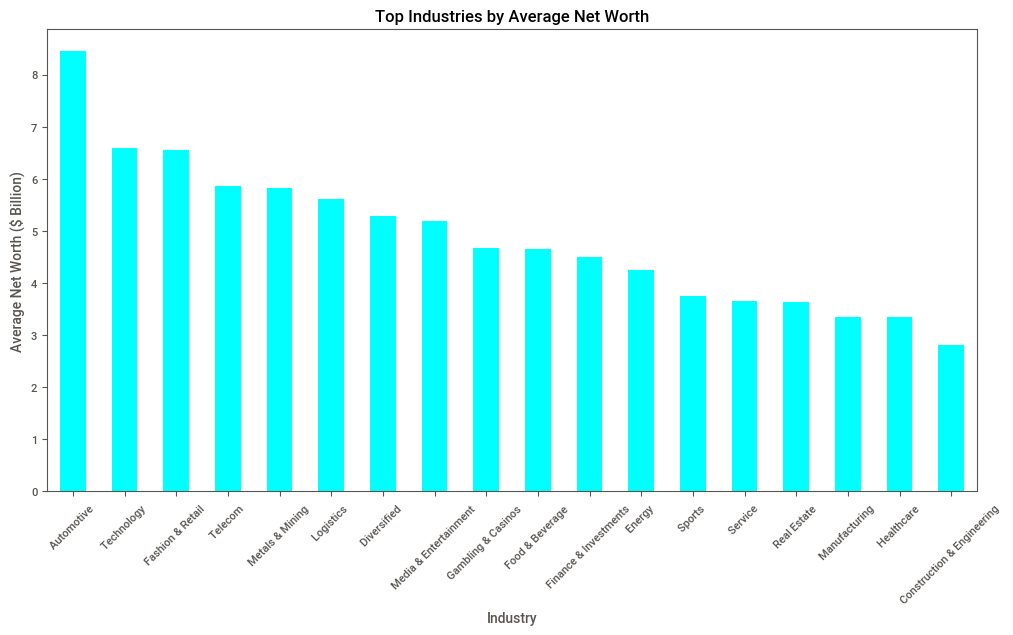

In [106]:
industry_net_worth = forbes_df.groupby('industry')['networth($ Billion)'].mean().sort_values(ascending=False)

# Plot a bar chart to visualize the top industries by average net worth
plt.figure(figsize=(12, 6))
industry_net_worth.plot(kind='bar', color='cyan')
plt.title('Top Industries by Average Net Worth')
plt.xlabel('Industry')
plt.ylabel('Average Net Worth ($ Billion)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [108]:
print("\nAverage Net Worth by Industry:")
print(industry_net_worth)


Average Net Worth by Industry:
industry
Automotive                     8.443478
Technology                     6.590881
Fashion & Retail               6.557724
Telecom                        5.860000
Metals & Mining                5.816418
Logistics                      5.605714
Diversified                    5.278090
Media & Entertainment          5.195789
Gambling & Casinos             4.678261
Food & Beverage                4.643532
Finance & Investments          4.493005
Energy                         4.250538
Sports                         3.753846
Service                        3.649020
Real Estate                    3.628571
Manufacturing                  3.353416
Healthcare                     3.343868
Construction & Engineering     2.811628
Name: networth($ Billion), dtype: float64


1. The automotive industry stands out with an average net worth of 8.44 billion. Those involved in this sector are likely to have higher net worth, indicating the potential for substantial wealth generation in this industry.
2. Despite having the most billionaires, this industry (Finance and investments) has an average net worth of 4.49 billion, which is relatively lower than some other industries. It might be advisable for individuals in this sector to diversify their investments to increase their average net worth.
3. With the lowest average net worth of 4.68 billion, this industry (Gambling and casinos) may offer limited opportunities for wealth creation. Those involved in this sector may diversify their investments outside of gambling and casinos.

*The "Finance and investments" industry stands out with the highest number of billionaires, while the "Automotive" industry leads in terms of average net worth. Diversification, innovation, and exploring emerging sectors may be recommended strategies for wealth generation. However, individual circumstances and market conditions should be carefully considered when making financial decisions.*

## Source of Wealth

In [125]:
# Count the number of billionaires for each source of wealth
source_counts = forbes_df['source'].value_counts()
source_counts

real estate               148
investments                93
pharmaceuticals            91
diversified                83
software                   57
                         ... 
ticketing service           1
touch screens               1
defense                     1
shipping, airlines          1
flavors and fragrances      1
Name: source, Length: 895, dtype: int64

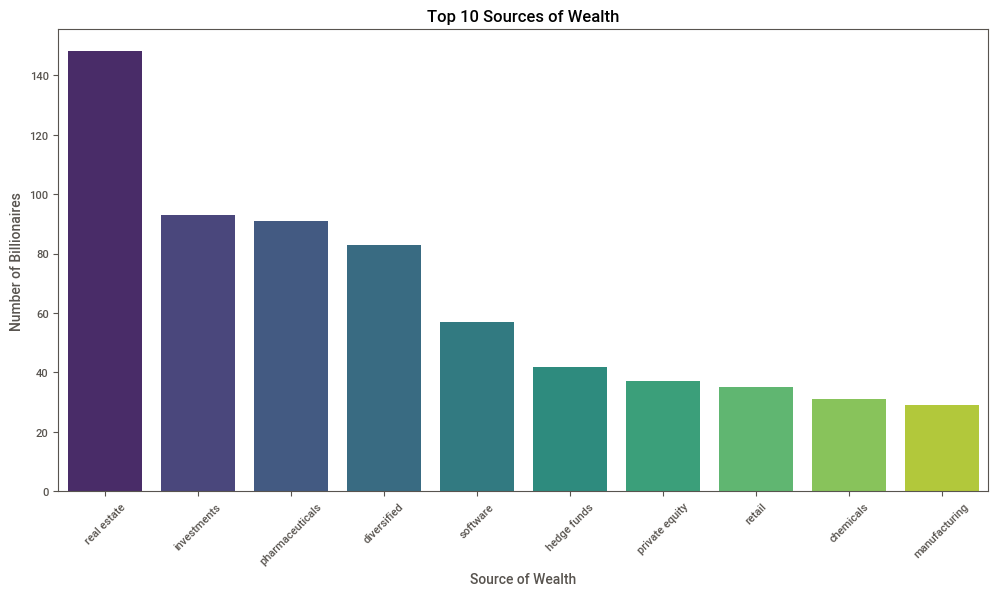

In [127]:
top_sources = source_counts.head(10)

# Create a bar plot to visualize the most common sources of wealth
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.title('Top 10 Sources of Wealth')
plt.xlabel('Source of Wealth')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=45)
plt.show()

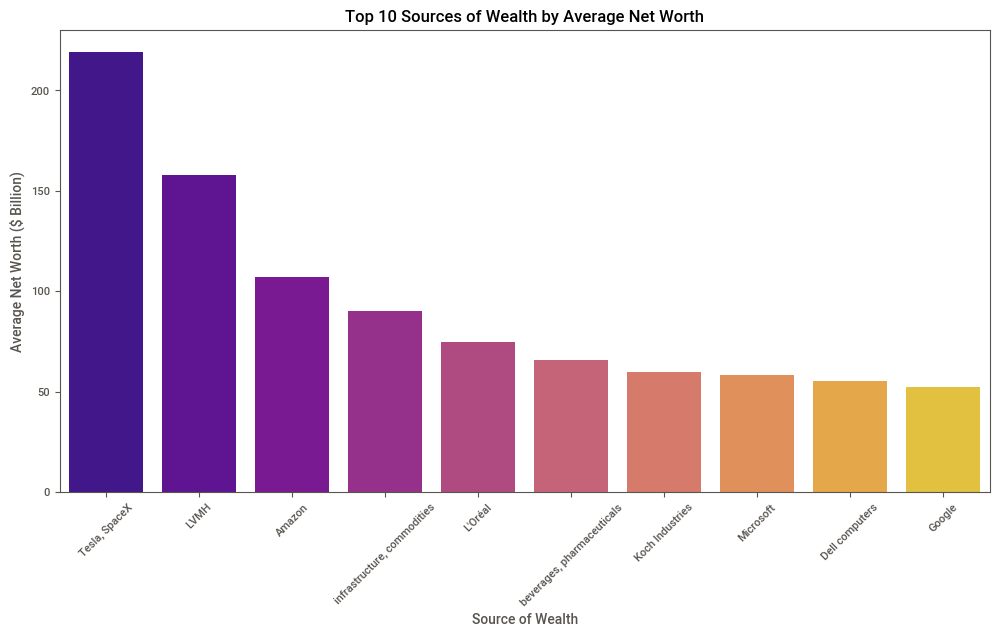

In [128]:
# Calculate the average net worth for each source of wealth
source_net_worth = forbes_df.groupby('source')['networth($ Billion)'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the average net worth by source of wealth
plt.figure(figsize=(12, 6))
sns.barplot(x=source_net_worth.index[:10], y=source_net_worth.values[:10], palette='plasma')
plt.title('Top 10 Sources of Wealth by Average Net Worth')
plt.xlabel('Source of Wealth')
plt.ylabel('Average Net Worth ($ Billion)')
plt.xticks(rotation=45)
plt.show()

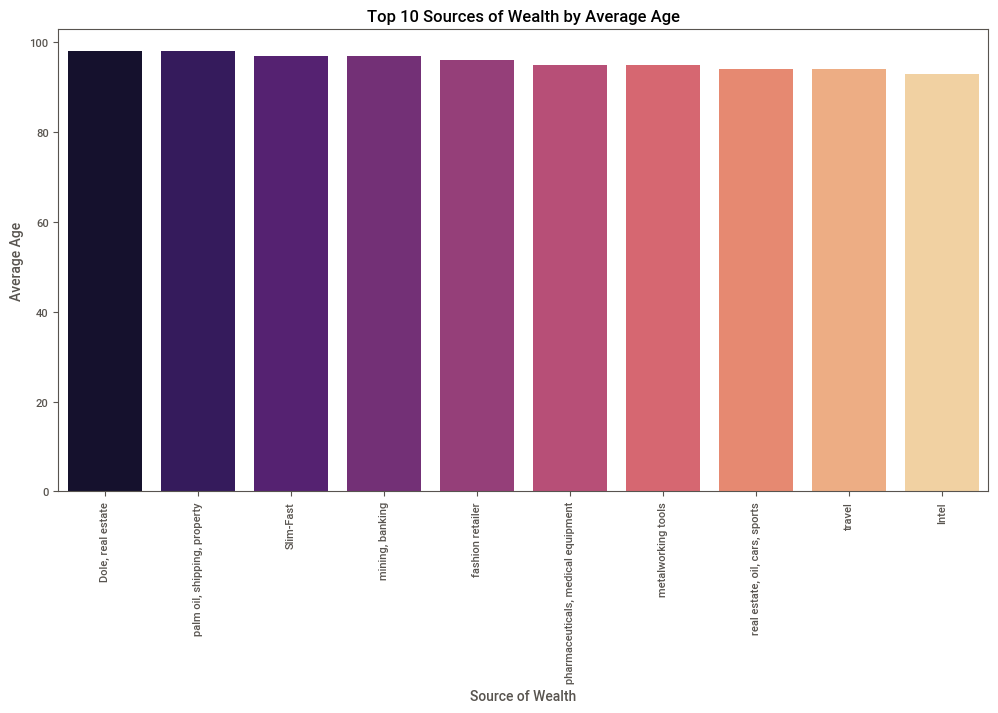

In [130]:
# Calculate the average age for each source of wealth
source_age = forbes_df.groupby('source')['age'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the average age by source of wealth
plt.figure(figsize=(12, 6))
sns.barplot(x=source_age.index[:10], y=source_age.values[:10], palette='magma')
plt.title('Top 10 Sources of Wealth by Average Age')
plt.xlabel('Source of Wealth')
plt.ylabel('Average Age')
plt.xticks(rotation=90)
plt.show()

## Age Analysis

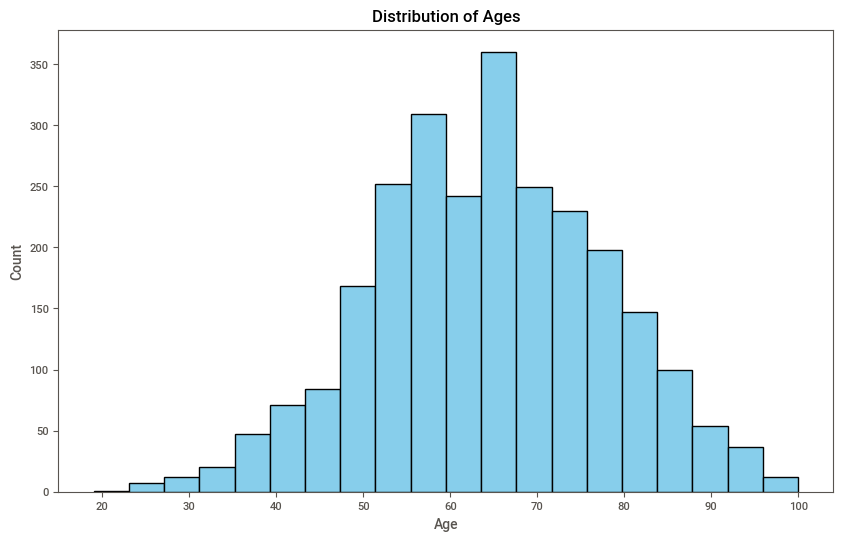

In [110]:
# 1. Distribution of Ages
plt.figure(figsize=(10, 6))
forbes_df['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Age distribution: referring to the forbesEDA_Report.html
1. There is a fairly typical distribution for individuals, with a minimum age of 19, a median (50th percentile) age of 64, and a maximum age of 100. The interquartile range (IQR), representing the middle 50% of ages, spans from 55 to 74, indicating a relatively uniform age distribution in this range.
2. The standard deviation is approximately 13.22, suggesting a moderate degree of dispersion in ages.
3. The coefficient of variation (CV) is low at 0.2057, indicating that age values are relatively consistent compared to the mean.
4. The skewness is negative (-0.04), indicating a slight leftward tail, although the kurtosis is close to zero, suggesting a relatively normal distribution without extreme tails.

*In summary, the age variable represents a diverse range of ages, with a central tendency around the median age of 64, but with moderate variation and a slightly left-skewed distribution. The majority of individuals fall within the interquartile range between 55 and 74 years old.*

In [112]:
# Age Variation by Country
age_by_country = forbes_df.groupby('country')['age'].mean().sort_values(ascending=False)
print("Average Age by Country:")
print(age_by_country)

Average Age by Country:
country
Eswatini (Swaziland)    90.0
Portugal                87.0
Oman                    83.0
St. Kitts and Nevis     82.0
Argentina               81.0
                        ... 
Bulgaria                50.5
Iceland                 49.5
Tanzania                46.0
Estonia                 41.0
Barbados                34.0
Name: age, Length: 75, dtype: float64


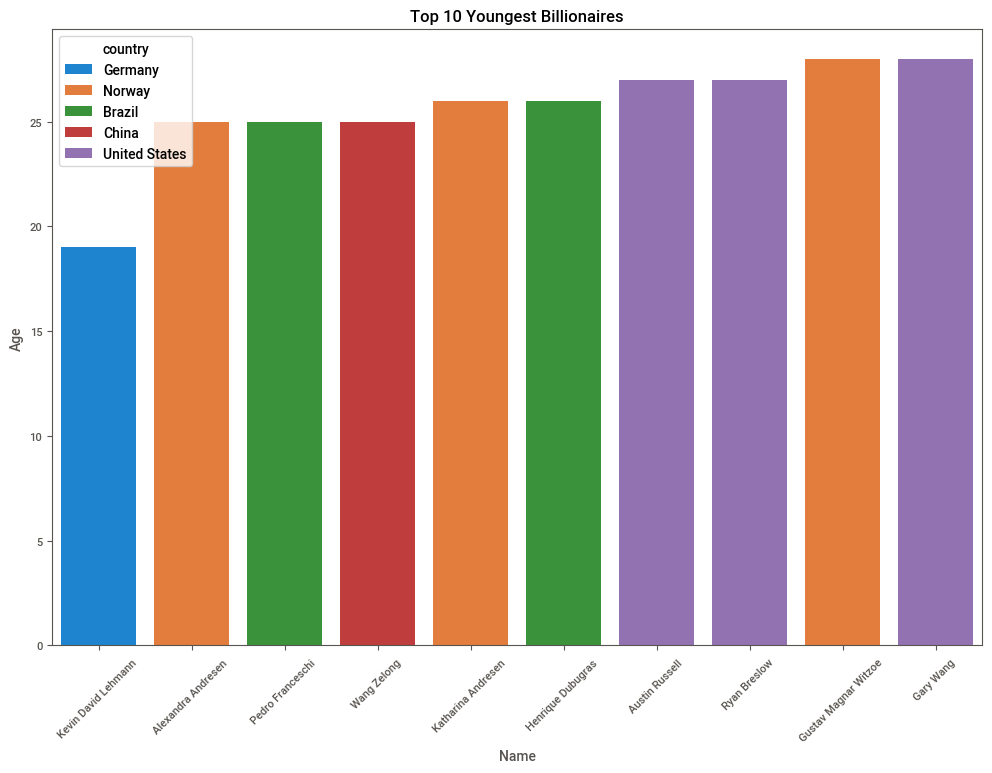

In [120]:
# 5. Top 10 Young Billionaires (color-coded by country)
youngest_billionaires = forbes_df.sort_values(by=['age', 'networth($ Billion)']).head(10)

# Top 10 Young Billionaires (color-coded by country)
plt.figure(figsize=(12, 8))
sns.barplot(data=youngest_billionaires, x='name', y='age', hue='country', dodge=False)
plt.title('Top 10 Youngest Billionaires')
plt.xlabel('Name')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


*The top 10 youngest billionaires represent a unique subset of the billionaire population.
They are exceptionally young, have diverse backgrounds, and are involved in various industries. 
Their net worth, while lower than the wealthiest individuals, is still substantial. 
This group's inclusion highlights the variety and youthfulness within the billionaire community.*

*The youngest billionaires come from various countries, including the United States, Germany, China, Brazil, and Norway. This diversity contrasts with the previous dataset, where the United States dominated.*

*These young billionaires are involved in diverse industries, including fintech, e-commerce software, cryptocurrency exchange, and fish farming.
This contrasts with the previous analysis, where "Finance & Investments" and "Automotive" were prominent industries among billionaires.*

*The net worth of these individuals ranges from 1.3 billion to 5.9 billion, with a median net worth of $1.55 billion. While this may seem lower compared to the top billionaires in the world, it is still a substantial fortune, especially considering their young age.*

In [121]:
# Top 10 Youngest Billionaires in the UK
youngest_billionaires_uk = uk_data.sort_values(by=['age', 'networth($ Billion)']).head(10)
print("Top 10 Youngest Billionaires in the UK:")
print(youngest_billionaires_uk)

Top 10 Youngest Billionaires in the UK:
      rank                name  networth($ Billion)  age         country  \
340    336      Nik Storonsky                   7.1   37  United Kingdom   
1738  1729       Saket Burman                   1.7   45  United Kingdom   
1514  1513     Andrey Andreev                   2.0   48  United Kingdom   
2045  1929  Christopher Rokos                   1.5   51  United Kingdom   
1300  1292        John Coates                   2.4   52  United Kingdom   
2148  2076        Simon Nixon                   1.4   54  United Kingdom   
1341  1341         Alex Beard                   2.3   54  United Kingdom   
508    509      Denise Coates                   5.3   54  United Kingdom   
121    121      Michael Platt                  15.2   54  United Kingdom   
287    288   Christopher Hohn                   7.9   55  United Kingdom   

                        source                industry  
340                    fintech  Finance & Investments   
1738     

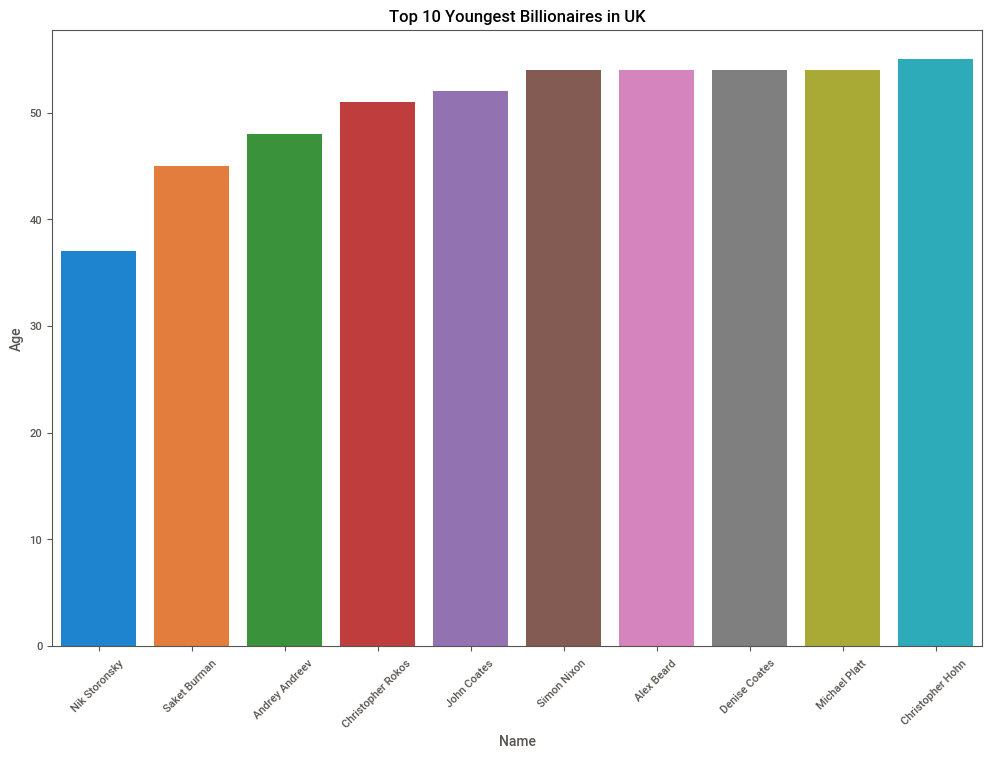

In [123]:
# Top 10 Young Billionaires (color-coded by country)
plt.figure(figsize=(12, 8))
sns.barplot(data=youngest_billionaires_uk, x='name', y='age', dodge=False)
plt.title('Top 10 Youngest Billionaires in UK')
plt.xlabel('Name')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


*The top 10 youngest billionaires in the UK are relatively older (37 to 55 years old), have a wider net worth range (15.2 and 1.4 billion), and have various sources of wealth and industries (fintech, hedge funds, consumer goods, and more) compared to the younger billionaires in the world (fintech, e-commerce software, cryptocurrency exchange, and fish farming).
It's interesting to see the diversity within these groups, each with its own unique characteristics.*

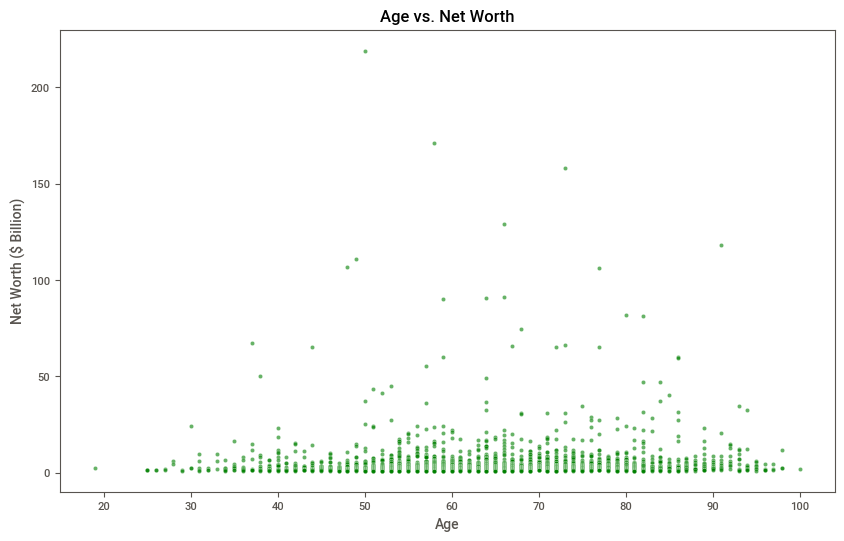

In [132]:
# Relationship between Age and Net Worth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=forbes_df, x='age', y='networth($ Billion)', color='green', alpha=0.6)
plt.title('Age vs. Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth ($ Billion)')
plt.show()

There is a weak positive correlation(0.124) between a person's net worth and their age. As age increases, net worth tends to increase slightly. This means that, on average, older individuals tend to have higher net worth, but the relationship is not very strong.

# Hypothesis Testing to compare the average net worth in the UK and the USA

*Null Hypothesis (H0): The population mean net worth in the UK is equal to the population mean net worth in the USA.*

*Alternative Hypothesis (H1): The population mean net worth in the UK is not equal to the population mean net worth in the USA.*

*A Significance Level (α) of 0.05 is used. willing to accept a 5% chance of making a Type I error.*

In [133]:
from scipy.stats import ttest_ind
uk_net_worth = forbes_df[forbes_df['country'] == 'United Kingdom']['networth($ Billion)']
usa_net_worth = forbes_df[forbes_df['country'] == 'United States']['networth($ Billion)']
t_stat, p_value = ttest_ind(uk_net_worth, usa_net_worth, equal_var=False)


In [134]:
t_stat, p_value

(-3.1316158303579367, 0.0019474993897120579)

*These values suggest that there is a statistically significant difference between the two groups being compared, with UK having a significantly lower mean (as indicated by the negative t-statistic).*

*The low p-value indicates that this difference is unlikely to be due to random chance, supporting the rejection of the null hypothesis that the population mean net worth in the UK is equal to the population mean net worth in the USA.*